<a href="https://colab.research.google.com/github/wertonr/UFPB/blob/main/Aula_5_Introdu%C3%A7%C3%A3o_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 5 - Introdução a análise de dados 




#Introdução


O presente relatório tem o seguinte tema:

**Implicações de fatores demograficos na sobrevivencia dos passageiros do Titanic**

Para isso, utilizou o base de dados os passageiros do titanic presente no kaggle (https://www.kaggle.com/competitions/titanic/data). 

Dessa forma, o objetivo desse relatório é responder as seguintes perguntas:


*   A variável **sexo** contribuiu para maior mortalidade?
*   A variável **idade** contribuiu para maior mortalidade?
*   A variável **classe da cabine** contribuiu para maior mortalidade?





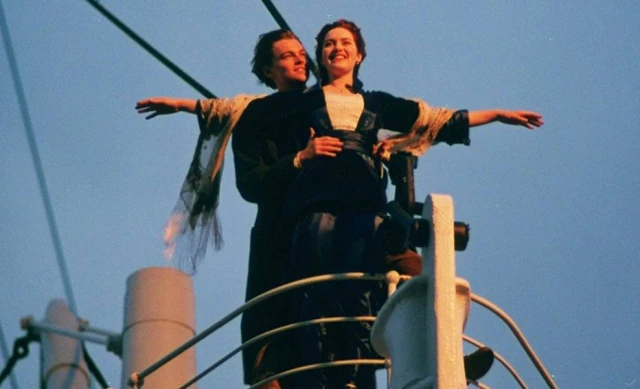

# Desenvolvimento

## Leitura do banco de dados e primeiras observações

In [ ]:
#Importar as bibliotecas que serão utilizadas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Ler um arquivo em formato csv e salvar na variavel dados 
dados = pd.read_csv('train.csv')

In [ ]:
#Ler as informações de cima do banco de dados
dados.head()

In [ ]:
#Ler as informações de baixo do banco de dados
dados.tail()

In [ ]:
#Informações sobre os dados
dados.info()

## Limpeza do banco de dados

Uma vez que o objetivo é analisar variaveis demograficas, serão retiradas colunas que não colaboraram com este intutuito. Desse modo, foram retirado as colunas de Identidade do passageiro, Número da Cabine, Número do Ticket, Nome do Passageiro, número de irmãos/conjuges a bordo e número de pais e filhos a bordo.
 

In [ ]:
# Verificando se existe caso duplicado
sum(dados.duplicated()) 

In [ ]:
# Limpar algumas colunas que não serão utilizadas: 
passageiros = dados.drop(['PassengerId','Cabin', 'Ticket', 'Name','SibSp','Parch'], axis=1)
passageiros

Como não foi encontrado caso duplicado e já foi realizada a retirada das colunas que não serão utilizadas, pode-se encerrar a limpeza dos dados e começar a análise.


## Análise de dados

In [ ]:
#Estatísticas dos dados
passageiros.describe()

Como a variavel "Survived", é uma variavel dicotomica em que 0 significa morte e 1 sobrevivencia, ao calcular a média desta coluna, descobre-se o percentual de sobreviventes de toda a amostra, que é aproximadamente 38,4%. 
Assim, será calculado o percentual de sobrevivencia para diferentes tipos de perfis demograficos e comparado com o percentual geral de 38,4%.

In [ ]:
#Analisando a proporção de homens e mulheres

porcentagemSexo = passageiros['Sex'].value_counts(normalize=True)
rotulo = ['Masculino', "Feminino"]
plt.pie(porcentagemSexo,labels = rotulo, autopct='%1.1f%%', colors = '')
plt.title('Gráfico 1 - Sexo dos passageiros do Titanic')
plt.show()


In [ ]:
cores = sns.color_palette('Set2')
plt.pie(porcentagemSexo,labels = rotulo, autopct='%1.1f%%', colors = cores)
plt.show()

Segundo o gráfico 1, percebe-se que a maioria dos passageiros no Titanic eram homens, aproximadamente 65% dos passageiros.



In [ ]:
passageiros['Age'].hist(figsize = (8,6));
plt.title('Gráfico 2 - Idade dos passageiros no Titanic')
plt.ylabel('Quantidade de passageiros')
plt.xlabel('Idade')
plt.show()

In [ ]:
passageiros['Age'].mean()

De acordo com o Gráfico 2, nota-se que a maioria dos passageiros estão na faixa etária entre 20 e 30 anos. Tendo a média de idade de 29,70 anos. 

In [ ]:
def sns_barra(x,y1):
   """
    Cria um gráfico de barras, necessária a importação das bibliotecas matplotlib e seaborn.

    INPUT:
    Coluna do Banco de Dados que será utilizada para criação do gráfico de barra.

    OUTPUT:
    Gráfico de barra da variavel do Banco de Dados escolhida no IMPUT.
   """
   sns.set(style="whitegrid", context="talk")
   f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
   sns.barplot(x, y1, palette="BuGn_d", ax=ax1)
   ax1.set_ylabel("Quantidade de passageiros")
   ax1.set_xlabel("Classe da cabine")
   sns.despine(bottom=True)
   plt.setp(f.axes, yticks=[])
   plt.title('Gráfico 3 - Quantidade de passageiros por Classe no Titanic') 
   plt.show()

sns_barra(passageiros['Pclass'],passageiros['Pclass'])

In [ ]:
passageirosClasse = passageiros['Pclass'].value_counts(normalize=True)
passageirosClasse

Com base no gráfico 3, constata-se que a maioria dos passageiros, 55,1%, estavam na terceira classe do Titanic, . Por fim, ao analisar os três gŕaficos, nota-se que o perfil demografico da amostra é de maioria homens, na faixa etária entre 20 e 30 anos e de passageiros na terceira classe do návio.



In [ ]:
#Sobreviventes por sexo
sobreviventes_sexo = passageiros.groupby('Sex')["Survived"].sum()
sobreviventes_sexo

Sex
female    233
male      109
Name: Survived, dtype: int64

In [ ]:
#Percentual de sobreviventes por sexo
passageiros.groupby('Sex')["Survived"].mean()

Ao medir o percentual de sorevivência por sexo, constatou-se uma discrepância entre homens e mulheres, na qual, as mulheres tiveram um percentual de sobrevivência muito maior do que os homens.

In [ ]:
#Sobreviventes por classe da cabine
sobreviventes_classe = passageiros.groupby('Pclass')["Survived"].sum()
sobreviventes_classe

In [ ]:
#Percentual de sobreviventes por classe
passageiros.groupby('Pclass')["Survived"].mean()

No tocante a diferença de sobrevivência por classe social, percebe-se que quanto maior a classe, maior o percentual de sobreviver ao acidente. Desse modo, enquanto que mais da metade dos passageiros (63%) da primeira classe sobreviveram ao acidente, na terceira classe menos de um quarto (24,2%) sairam com vida deste desastre.

Vias de conclusão, a última variavel estudada será a idade. Todavia, como esta variavel possui uma grande quantidade de valores, se fez necessario a criação de uma nova coluna (faixa etaria) no banco de dados, para uma melhor observação dos dados.

In [ ]:
#Criando as faixas etárias
bin_edges = [0,5,10,15,20,25,30,35,40,45,50,55,60,100]
bin_names = ['0 a 5 anos','5 a 10 anos','10 a 15 anos','15 a 20 anos','20 a 25 anos','25 a 30 anos','30 a 35 anos', '35 a 40 anos','40 a 45 anos', '45 a 50 anos', '50 a 55 anos','55 a 60 anos','60 ou mais']
passageiros['faixa_etaria'] = pd.cut(passageiros['Age'], bin_edges, labels=bin_names)

In [ ]:
#Percentual de sobreviventes por faixa etária
passageiros.groupby('faixa_etaria')['Survived'].mean().to_frame()


,Survived
faixa_etaria,
0 a 5 anos,0.704545
5 a 10 anos,0.350000
10 a 15 anos,0.578947
15 a 20 anos,0.343750
20 a 25 anos,0.344262
25 a 30 anos,0.388889
30 a 35 anos,0.465909
35 a 40 anos,0.417910
40 a 45 anos,0.361702


Por fim, também fica claro uma relação entre idade e sobrevivencia no incidente. Uma vez que na tabela acima, percebe-se que a faixa etaria de 0 a 5 anos teve um grande percentual de sobrevivencia (70,4%), enquanto que na faixa etária acima de 60 anos, este percentual foi de apenas 22,7%.

In [ ]:
#Correlação entre as variáveis
dados.corr()

# Conclusão

Ao realizar calculos por variavel demografica, percebe-se indicadores de uma grande correlação entre sexo e mortalidade no acidente, uma vez que aproximadamente 74,2% das mulheres sobreviveram contra apenas 18,9% dos homens.

Além disso, observa-se também uma forte correlação entre a classe do passageiro no Titanic e a sobrevivência, já que entre os passageiros da primeira classe mais de 62% sobreviveram, ao passo que da segunda classe esse percentual diminui para 47,3% e na terceira classe para 24,2%.

Por fim, no tocante a faixa etária, nota-se apenas correlações significativas na primeira faixa etária (0 a 5 anos), com percentual de sobrevivência acima de 70%, e na última faixa etária (60 ou mais), com percentual de sobrevivência abaixo dos 23%. Ademais, as demais faixas etarias tiveram valores proximos da média geral encontrada.


## Limitações


Com relação aos dados analisados, ocorreram limitações sobre algumas variaveis:

* Cabin: Possuia um grande número de dados faltantes, logo foi excluida da analise dos dados.

* Age: Possuia mais de 100 passageiros com dados de idades faltando, todavia, foi realizado o cálculo de sobrevivência por idade somente dos dados fornecidos. Além disso, criou-se uma nova coluna (faixa etaria)  para melhor visualização dos resultados de sobrevivência por idade.  

* PClass: Como o intuito do trabalho era estudar dados demograficos, considerou-se para a presente analise que cada classe no navio é correspondente a classe social do passageiro. Uma vez que a primeira classe possuia as passagens mais caras, a segunda seria a classe média e a terceira a classe baixa. 

## Referências



Sites utilizados como referências:

https://www.vooo.pro/insights/biblioteca-seaborn-com-o-matplotlib/

https://paulovasconcellos.com.br/15-comandos-de-matplotlib-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-17cf88a75119

http://minerandodados.com.br/index.php/2017/05/30/7-tipos-graficos-cientista-de-dados/

http://felipegalvao.com.br/blog/2016/03/08/visualizacao-de-dados-com-python-matplotlib/